In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
season = 'JAS'
data_dir = '/Volumes/My Passport for Mac/cnn/data_update/with_precip/precip_data/results/'

In [3]:
mpc_bs = np.loadtxt(data_dir +  'mpc_bs_'+ season +  '.txt')
mpc_crps = np.loadtxt(data_dir +  'mpc_crps_'+ season +  '.txt')
dim_base_crps = np.loadtxt(data_dir + 'dim_base_crps_v1+time_' + season + '.txt')
logit_base_bs = np.loadtxt(data_dir + 'logit_base_bs_v1+time_' + season + '.txt')

In [4]:
logit_bs = np.loadtxt(data_dir + 'logit_bs_v2+time_' + season + '.txt')
dim_crps = np.loadtxt(data_dir + 'dim_crps_v2+time_' + season + '.txt')
cnn_bs = np.loadtxt(data_dir + 'cnn_bs_v2+time_' + season + '.txt')
cnn_crps = np.loadtxt(data_dir + 'cnn_crps_v2+time_' + season + '.txt')
hybrid_bs = np.loadtxt(data_dir + 'hybrid_bs_v2+time_' + season + '.txt')
hybrid_crps = np.loadtxt(data_dir + 'hybrid_crps_v2+time_' + season + '.txt')

In [5]:
hres_bs = np.loadtxt(data_dir + 'hres_bs_' + season + '.txt')
hres_crps = np.loadtxt(data_dir + 'hres_crps_' + season + '.txt')
ecmwf_bs = np.loadtxt(data_dir +  'ecmwf_bs_'+   season + '.txt')
ecmwf_crps = np.loadtxt(data_dir +  'ecmwf_crps_'+   season + '.txt')
ecmwf_pp_bs = np.loadtxt(data_dir +  'ecmwf_pp_bs_'+   season + '.txt')
emos_crps = np.loadtxt(data_dir +  'emos_crps_'+   season + '.txt')

In [6]:
color_plot = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2','#7f7f7f','#bcbd22', '#17becf']

In [7]:
# Get the current working directory
current_dir = os.getcwd()

OSError: [Errno 30] Read-only file system: '/bs_crps_JAS.pdf'

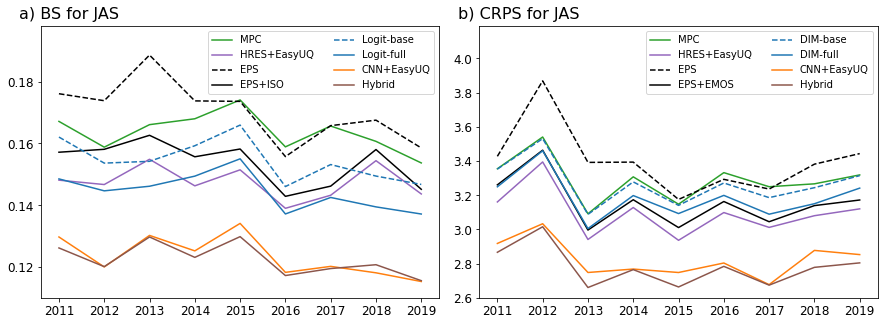

In [8]:
fig, ax = plt.subplots(1, 2,figsize=(15,5))
ax = ax.ravel()
plt.subplots_adjust(wspace=0.1)
ax[0].plot(mpc_bs, label = 'MPC', color = color_plot[2])
ax[0].plot(hres_bs, label = 'HRES+EasyUQ', color = color_plot[4])
ax[0].plot(ecmwf_bs, '--',label = 'EPS', color = 'black')
ax[0].plot(ecmwf_pp_bs, label = 'EPS+ISO', color = 'black')

ax[0].plot(logit_base_bs, '--' ,label = 'Logit-base', color = color_plot[0])
ax[0].plot(logit_bs, label = 'Logit-full', color = color_plot[0])
ax[0].plot(cnn_bs, label = 'CNN+EasyUQ', color = color_plot[1])
ax[0].plot(hybrid_bs, label = 'Hybrid', color = color_plot[5])
ax[0].set_ylim(0.11, 0.198)
ax[0].set_yticks([0.12, 0.14, 0.16, 0.18])

ax[1].plot(mpc_crps, label = 'MPC', color = color_plot[2])
ax[1].plot(hres_crps, label = 'HRES+EasyUQ', color = color_plot[4])
ax[1].plot(ecmwf_crps, '--',label = 'EPS', color = 'black')
ax[1].plot(emos_crps, label = 'EPS+EMOS', color = 'black')

ax[1].plot(dim_base_crps, '--' ,label = 'DIM-base', color = color_plot[0])
ax[1].plot(dim_crps, label = 'DIM-full', color = color_plot[0])
ax[1].plot(cnn_crps, label = 'CNN+EasyUQ', color = color_plot[1])
ax[1].plot(hybrid_crps, label = 'Hybrid', color = color_plot[5])
ax[1].set_ylim(2.6, 4.19)

for j in range(2):
    ax[j].set_xticks(np.arange(9))
    x = ax[j].set_xticklabels(np.arange(2011, 2020))
    ax[j].tick_params(axis='y', labelsize=12)
    ax[j].tick_params(axis='x', labelsize=12)
    ax[j].legend(loc = 'upper right', ncol = 2)

from matplotlib import transforms
def label_panel(ax, letter, *,offset_left=0.3, offset_up=0.1, **font_kwds):
    kwds = dict(fontsize=16)
    kwds.update(font_kwds)
    fig = ax.figure
    trans = ax.transAxes + transforms.ScaledTranslation(-offset_left, offset_up, fig.dpi_scale_trans)
    ax.text(0, 1, letter, transform=trans, **kwds)

label_panel(ax[0],'a) BS for ' + season)
label_panel(ax[1],'b) CRPS for ' + season)

plt.savefig(os.path.join(current_dir, '/bs_crps_'+season+'.pdf'), bbox_inches = 'tight')

In [ ]:
os.path.join(current_dir, '/bs_crps_'+season+'.pdf')